# CHSH 不等式
エンタングルした量子ビットのもつ相関が古典を超える

## 量子もつれ
2つの量子が非局所的な相関を持つ
非局所性: 片方の状態を観測すると, もう片方の状態がその瞬間距離に関係なく決定
* アインシュタイン、ポドルスキー、ローゼンはこの現象が相対性理論に反すると主張(EPRパラドックス)
    "片方の状態の決定がもう片方の状態の決定を瞬時に行うのであるならば、情報が光よりも早く伝わってしまうのではないか"
    "もつれの生成時には既に状態は決定していたのではないか"(隠れた変数理論)

## CHSH不等式
1964年：ジョン・スチュアート・ベルが局所実在論が満たすべき不等式(Bellの不等式)を提案
1969年:クラウザー, ホルネ, シモニー, ホルトがBellの不等式を一般化(CHSH不等式)
$$S = |\langle AB \rangle - \langle aB \rangle + \langle Ab \rangle + \langle ab \rangle| \leqq 2$$
* 満たされる→EPRが正しい
* 満たされない→量子もつれは非局所性を持つ
* $2\sqrt{2}$を超える→実験の失敗(チレルソン限界)

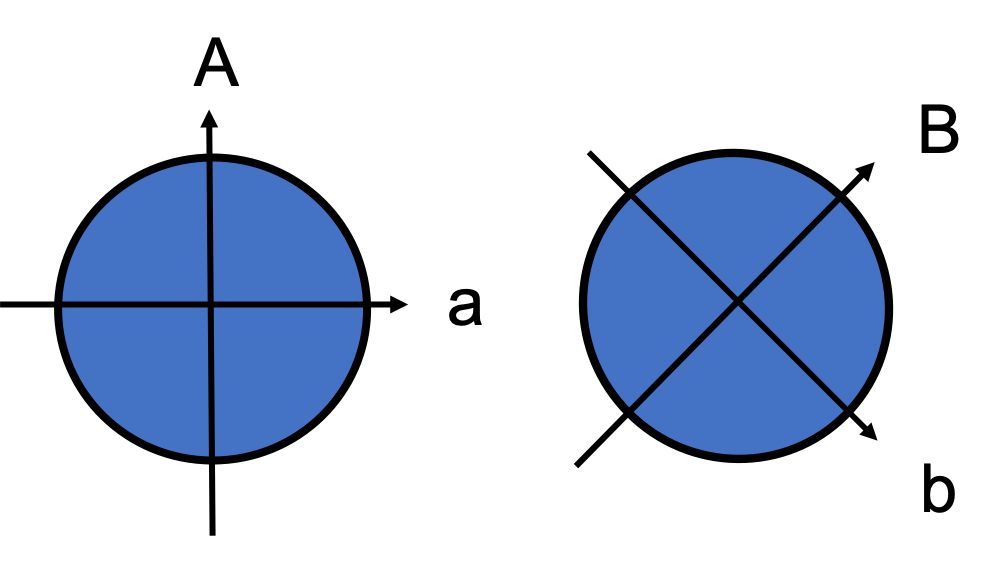

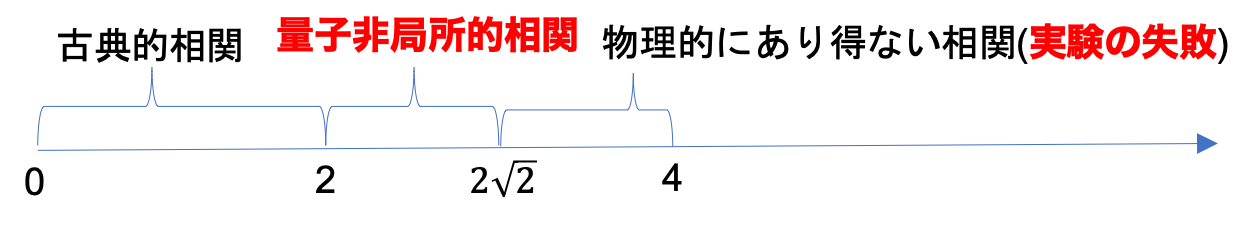

In [1]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("basis.png"))
display_png(Image("entangle.png"))

## 準備
ベル状態　もっとも単純な量子もつれ状態。２量子ビットからなり、4種類ある。

$$|\Psi^+ \rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$
$$|\Psi^- \rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}$$
$$|\Phi^+ \rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$
$$|\Phi^+ \rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}$$

ここで、$|01\rangle$は$|0\rangle \otimes|1\rangle$ : １つ目の量子ビットが0状態、2つ目の量子ビットが1状態、という意味

### Hゲート
Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば$|0\rangle$にHゲートを適用すると、$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$のような重ね合わせ状態を作ることができます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

### CXゲート(CNOTゲート)
CXゲートは制御NOTゲート、CNOTとも呼ばれます。CXゲートは、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが$\left|1\right\rangle$のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$


$|\Phi^+ \rangle$は以下のように作成できる
* Hゲートで$\frac{|0 \rangle + |1 \rangle}{\sqrt{2}}\otimes |0\rangle$
* Xゲートで$\frac{|0 \rangle + |1 \rangle}{\sqrt{2}}\otimes |1\rangle$
* CNOTゲート で完成

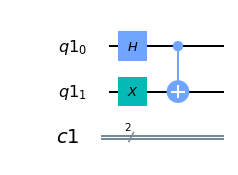

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
def make_phi_plus(qubit0, qubit1):
    qc.h(qubit0)
    qc.x(qubit1)
    qc.cx(qubit0, qubit1)

make_phi_plus(q[0],q[1])
qc.draw(output='mpl')

In [4]:
qc.measure(q,c)
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)

{'01': 492, '10': 508}


## 測定に用いる基底
IBMの量子計算機では, 観測に使える基底はZ基底のみ
* 回転する操作を加え, X基底, Y基底による観測の代わりとする.

### Z測定

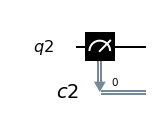

In [5]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def A_basis(qubit, bit):
    qc.measure(qubit,bit)

A_basis(q[0],c[0])
qc.draw(output='mpl')

### X測定

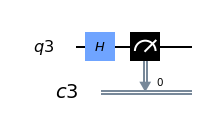

In [6]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def a_basis(qubit, bit):
    qc.h(qubit)
    qc.measure(qubit,bit)

a_basis(q[0],c[0]) 
qc.draw(output='mpl')

### $\frac{Z+X}{\sqrt{2}}$ 測定

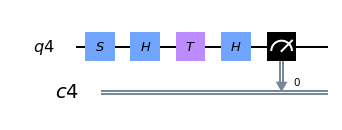

In [7]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def B_basis(qubit, bit):
    qc.s(qubit)
    qc.h(qubit)
    qc.t(qubit)
    qc.h(qubit)
    qc.measure(qubit,bit)
B_basis(q[0],c[0])
qc.draw(output='mpl')

### $\frac{Z-X}{\sqrt{2}}$ 測定 

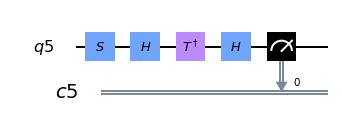

In [8]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def b_basis(qubit, bit):
    qc.s(qubit)
    qc.h(qubit)
    qc.tdg(qubit)
    qc.h(qubit)
    qc.measure(qubit,bit)
    
b_basis(q[0],c[0])
qc.draw(output='mpl')

$$\langle MN \rangle=𝑃_{00}+𝑃_{11}−𝑃_{01}−𝑃_{10}$$
* $𝑃_{𝑚𝑛}$は、$状態_{𝑚𝑛}$が観測される確率(推定値) 

## AB 

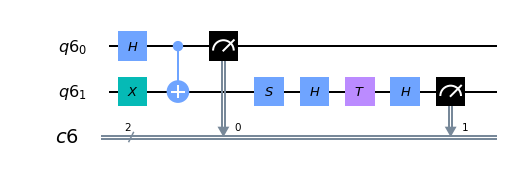

In [9]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])    
A_basis(q[0],c[0])
B_basis(q[1],c[1])
qc.draw(output='mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
countAB =result.get_counts()
print(countAB)

{'10': 433, '01': 419, '11': 72, '00': 76}


In [11]:
AB = (countAB['00'] + countAB['11'] - countAB['01'] -countAB['10'])/1000
print(AB)

-0.704


## aB 

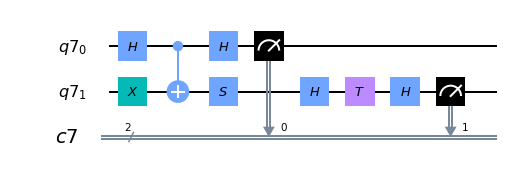

In [12]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])    
a_basis(q[0],c[0])
B_basis(q[1],c[1])
qc.draw(output='mpl')

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
countaB =result.get_counts()
print(countaB)

{'10': 79, '01': 76, '11': 443, '00': 402}


In [14]:
aB = (countaB['00'] + countaB['11'] - countaB['01'] -countaB['10'])/1000
print(aB)

0.69


## Ab

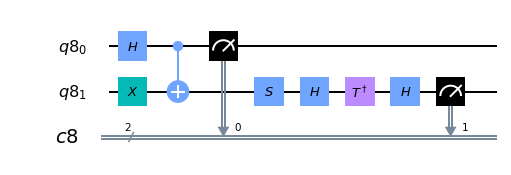

In [15]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])    
A_basis(q[0],c[0])
b_basis(q[1],c[1])
qc.draw(output='mpl')

In [16]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()

countAb =result.get_counts()
print(countAb)

{'10': 437, '01': 411, '11': 70, '00': 82}


In [17]:
Ab = (countAb['00'] + countAb['11'] - countAb['01'] -countAb['10'])/1000
print(Ab)

-0.696


## ab

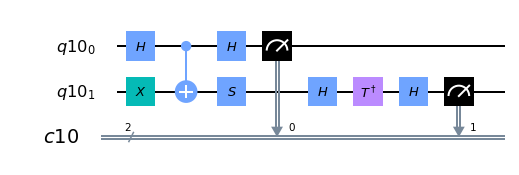

In [19]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])    
a_basis(q[0],c[0])
b_basis(q[1],c[1])
qc.draw(output='mpl')

In [20]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
countab =result.get_counts()
print(countab)

{'10': 438, '01': 424, '11': 68, '00': 70}


In [21]:
ab = (countab['00'] + countab['11'] - countab['01'] -countab['10'])/1000
print(ab)

-0.724


In [22]:
S = AB - aB  + Ab + ab 
print(S)

-2.814
